## Import

In [ ]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.vision import *
from google.colab import drive, files
import os
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

Accessing google drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Config.data_path()/'architecture'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/architecture')

In [ ]:
os.listdir('/content/drive/MyDrive/EMA')

['conf_matrix_resnet34.png',
 'modeldb_en.zip',
 'conf_matrix_resnet50_fined.png',
 'predictions_resnet50.png',
 'stage-1-resnet50-6cycles.pth',
 'resnet50-6cycles.pth']

In [ ]:
! unzip -q -n '/content/drive/MyDrive/EMA/modeldb_en.zip' -d {path}

## Looking at the data

In [ ]:
os.listdir('/root/.fastai/data/architecture/modeldb_en')

['cutlery',
 'platter',
 'sconce',
 'chest of drawers',
 'sideboard',
 'oratory',
 'jug',
 'kerosene lamp',
 'cup of tea',
 'table knife',
 'curtain',
 'lamp',
 'glass',
 'vase',
 'bed',
 'mirror',
 'dish',
 'lantern',
 'saucer',
 'chandelier',
 'chair',
 'chest',
 'fork',
 'table',
 'cup',
 'bottle',
 'pan',
 'spoon',
 'wardrobe',
 'candlestick',
 'luminaire']

In this particular dataset, labels are stored in the folder name which contains images of each class. We will need to extract them to be able to classify the images into the correct categories. The fastai library has a function made for this, `ImageDataBunch.from_folder`.

In [ ]:
# to not get different results everytime and to be sure that the improvement
# has not been only been chance
np.random.seed(50)

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=299, num_workers=2, bs=64).normalize(imagenet_stats)

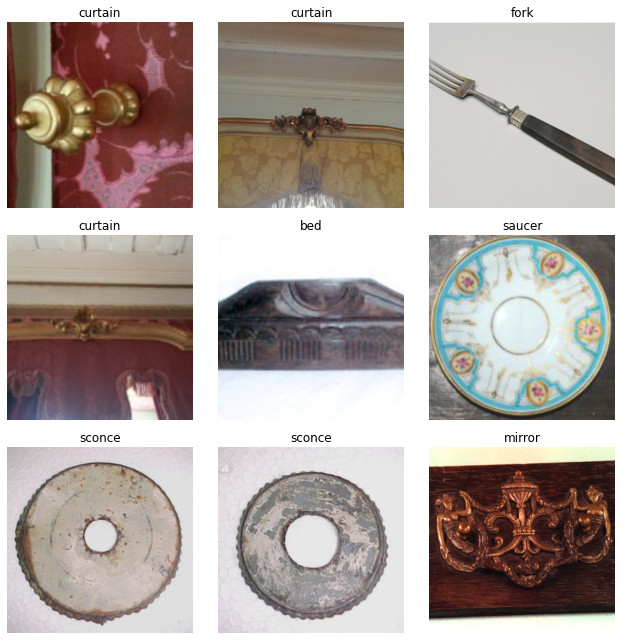

In [ ]:
data.show_batch(rows=3, figsize=(9, 9))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bed',
  'bottle',
  'candlestick',
  'chair',
  'chandelier',
  'chest',
  'chest of drawers',
  'cup',
  'cup of tea',
  'curtain',
  'cutlery',
  'dish',
  'fork',
  'glass',
  'jug',
  'kerosene lamp',
  'lamp',
  'lantern',
  'luminaire',
  'mirror',
  'oratory',
  'pan',
  'platter',
  'saucer',
  'sconce',
  'sideboard',
  'spoon',
  'table',
  'table knife',
  'vase',
  'wardrobe'],
 31,
 9597,
 2399)

### Training

fit_one_cycle(n) 

n: number of epochs

epochs: looking at every input once. n too big, loot of parameters and high lr maybe overfiting 

Things that can go wrong



*   Learning rate (LR) too high: huge valid_loss
*   Learning rate (LR) too low: valid_loss barerly change during epochs
*   Too few epochs 
*   Too many epochs: valid_loss grows during epochs



## Training: resnet50

wd: weight decay
To avoid overfitting and still using a big amont of parameters. To make te function less complex, 

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate], wd=1e-1)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
learn.load('/content/drive/MyDrive/EMA/resnet50-6cycles')


Learner(data=ImageDataBunch;

Train: LabelList (9597 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
cutlery,cutlery,cutlery,cutlery,cutlery
Path: /root/.fastai/data/architecture;

Valid: LabelList (2399 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
dish,oratory,dish,oratory,chair
Path: /root/.fastai/data/architecture;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

In [ ]:
#ls /content/drive/MyDrive/EMA/stage-1-resnet50-6cycles.pth

In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.236457,0.236871,0.884952,0.115048,08:48
1,0.320624,0.263557,0.876198,0.123802,08:31
2,0.286499,0.260806,0.878283,0.121717,08:23
3,0.239055,0.229410,0.880367,0.119633,08:28
4,0.187177,0.217618,0.871196,0.128804,08:43
5,0.181888,0.217392,0.862443,0.137557,08:30


In [ ]:
learn.save('resnet50-6cycles-2')

In [ ]:
cp /root/.fastai/data/architecture/models/resnet50-6cycles-2.pth /content/drive/MyDrive/EMA/

### Unfreezing, fine-tuning and learning rates

In [ ]:
#learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


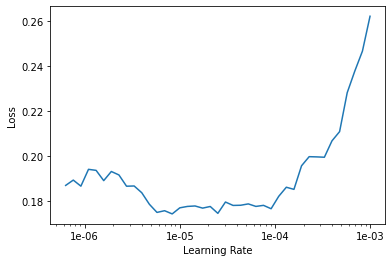

In [ ]:
#learn.lr_find()
#learn.recorder.plot()

In [ ]:
#learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.198082,0.226260,0.865777,0.134223,07:03
1,0.212069,0.235504,0.859108,0.140892,07:05
2,0.201575,0.225640,0.859108,0.140892,07:04
3,0.181923,0.225117,0.862026,0.137974,07:06
4,0.174145,0.221092,0.850771,0.149229,07:03
5,0.170611,0.223136,0.852022,0.147978,07:05


In [ ]:
#learn.save('resnet50-v2', return_path=True)

PosixPath('/root/.fastai/data/architecture/models/resnet50-v2.pth')

### Results resnet50

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused()

[('spoon', 'cutlery', 58),
 ('table knife', 'cutlery', 44),
 ('cutlery', 'spoon', 34),
 ('cutlery', 'table knife', 32),
 ('sideboard', 'curtain', 31),
 ('luminaire', 'sconce', 26),
 ('sconce', 'luminaire', 17),
 ('cutlery', 'fork', 16),
 ('curtain', 'sideboard', 15),
 ('fork', 'cutlery', 11),
 ('bed', 'jug', 7),
 ('fork', 'spoon', 5),
 ('dish', 'spoon', 4),
 ('cup of tea', 'spoon', 3),
 ('mirror', 'chest', 3),
 ('saucer', 'cup of tea', 3),
 ('sideboard', 'table', 3),
 ('chest', 'mirror', 2),
 ('cup', 'spoon', 2),
 ('cup of tea', 'saucer', 2),
 ('luminaire', 'table', 2),
 ('table', 'luminaire', 2),
 ('table', 'sideboard', 2),
 ('chest of drawers', 'chest', 1),
 ('chest of drawers', 'fork', 1),
 ('glass', 'spoon', 1),
 ('lamp', 'jug', 1),
 ('luminaire', 'table knife', 1),
 ('table knife', 'spoon', 1)]

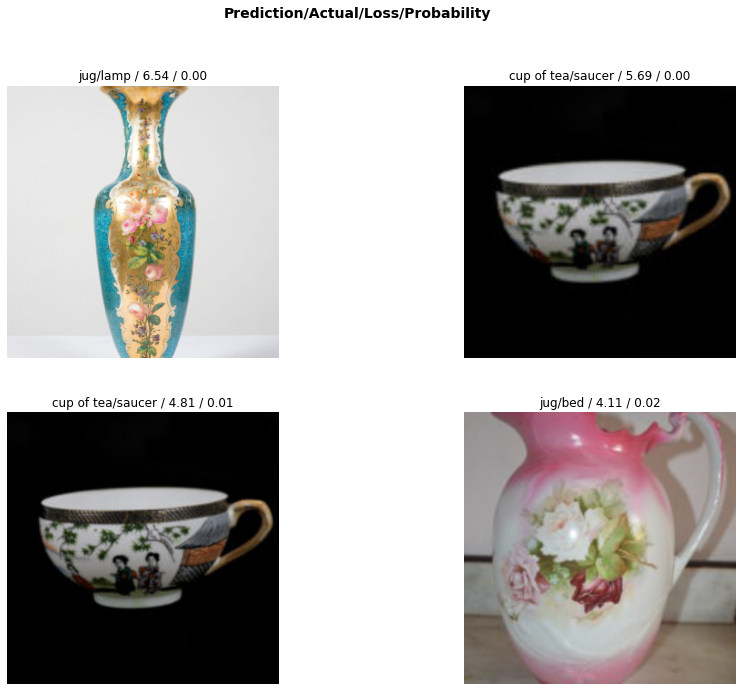

In [ ]:
interp.plot_top_losses(4, figsize=(15,11))

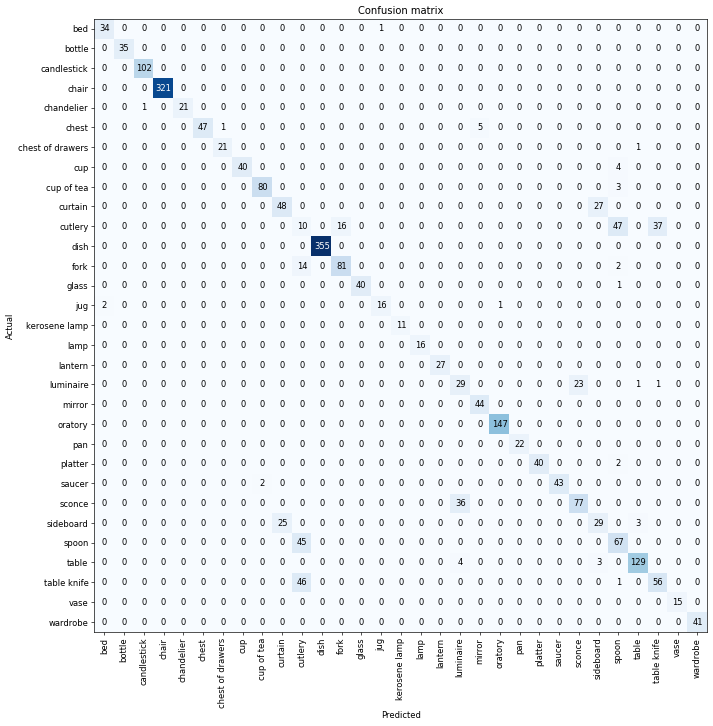

In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
# plt.savefig('/content/drive/MyDrive/EMA/conf_matrix_resnet50_fined.png')


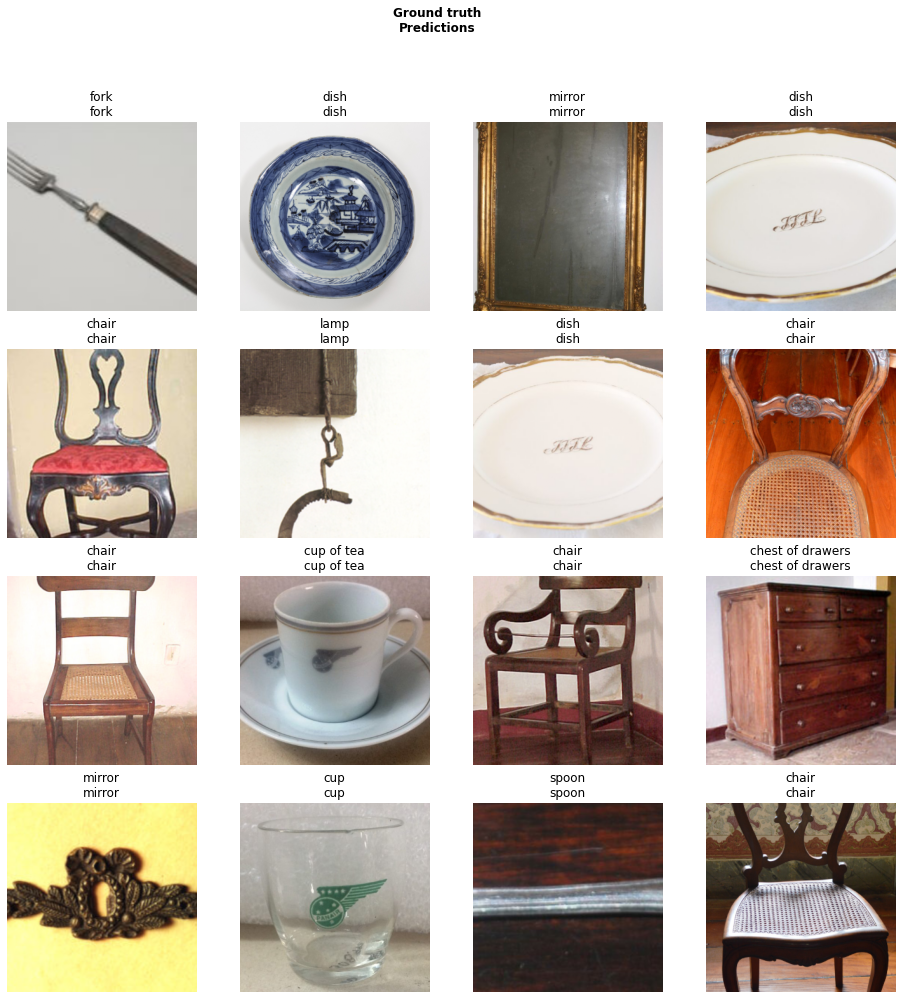

In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

learn.show_results(rows=4)
#plt.savefig('/content/drive/MyDrive/EMA/predictions_resnet50.png')

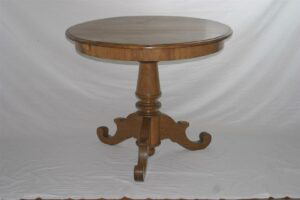

In [ ]:
img = open_image(path/'modeldb_en/table/MRSJ_22054_2.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
data.classes[int(pred_class)]

'table'

In [ ]:
preds, targs = learn.TTA()

TypeError: ignored